<a href="https://colab.research.google.com/github/SupplyChainData/Proyek-Analisis-Data/blob/main/Dashboard_Streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
conda activate main-ds

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

In [ ]:
day_df = pd.read_csv("https://raw.githubusercontent.com/SupplyChainData/Proyek-Analisis-Data/refs/heads/main/day.csv")

In [ ]:
all_df = pd.read_csv("all_data.csv")

2025-04-07 15:39:16.096 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 15:39:16.100 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 15:39:16.101 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 15:39:16.156 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 15:39:16.157 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 15:39:16.161 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 15:39:16.163 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 15:39:16.164 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

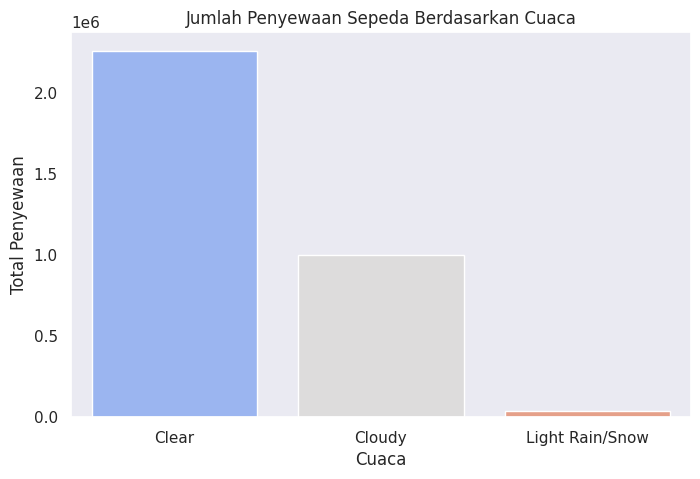

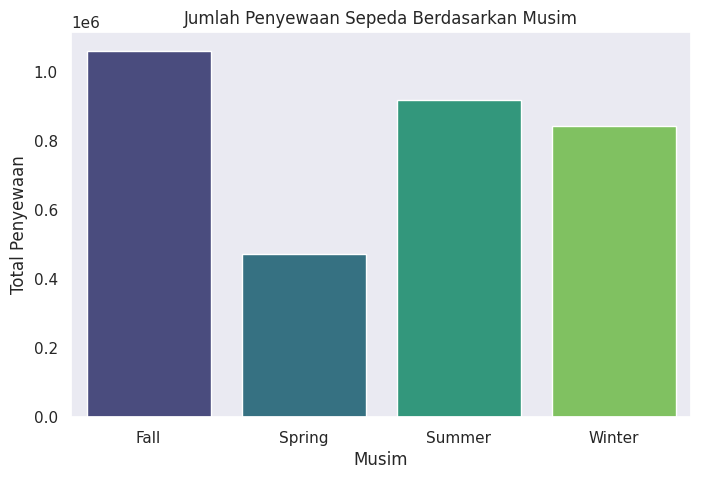

In [ ]:
# Konfigurasi dasar
st.set_page_config(page_title="Bike Sharing EDA & RFM Dashboard", layout="wide")
st.title("📊 Bike Sharing Dashboard")

# Load data
day_df = pd.read_csv("day.csv")

# Preprocessing
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month

# Mapping kategori
day_df['season'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day_df['weathersit'] = day_df['weathersit'].map({1: 'Clear', 2: 'Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain'})

# Reference date untuk RFM
reference_date = day_df['dteday'].max()

# RFM Analysis - Cuaca
rfm_weather = day_df.groupby('weathersit').agg({
    'dteday': lambda x: (reference_date - x.max()).days,
    'weathersit': 'count',
    'cnt': 'sum'
}).rename(columns={
    'dteday': 'Recency',
    'weathersit': 'Frequency',
    'cnt': 'Monetary'
}).reset_index()

# RFM Analysis - Musim
rfm_season = day_df.groupby('season').agg({
    'dteday': lambda x: (reference_date - x.max()).days,
    'season': 'count',
    'cnt': 'sum'
}).rename(columns={
    'dteday': 'Recency',
    'season': 'Frequency',
    'cnt': 'Monetary'
}).reset_index()

# Tab navigasi
tabs = st.tabs(["Cuaca Ramai", "Musim Ramai"])

# Tab Cuaca
with tabs[0]:
    st.header("🌤️ RFM Analysis - Cuaca")

    st.subheader("📋 Tabel RFM Cuaca")
    st.dataframe(rfm_weather)

    st.subheader("📊 Visualisasi Total Penyewaan Berdasarkan Cuaca")
    weather_rentals = day_df.groupby('weathersit')['cnt'].sum().reset_index()
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(data=weather_rentals, x='weathersit', y='cnt', palette='coolwarm', ax=ax)
    ax.set_title("Jumlah Penyewaan Sepeda Berdasarkan Cuaca")
    ax.set_xlabel("Cuaca")
    ax.set_ylabel("Total Penyewaan")
    st.pyplot(fig)

# Tab Musim
with tabs[1]:
    st.header("🌱 RFM Analysis - Musim")

    st.subheader("📋 Tabel RFM Musim")
    st.dataframe(rfm_season)

    st.subheader("📊 Visualisasi Total Penyewaan Berdasarkan Musim")
    season_rentals = day_df.groupby('season')['cnt'].sum().reset_index()
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(data=season_rentals, x='season', y='cnt', palette='viridis', ax=ax)
    ax.set_title("Jumlah Penyewaan Sepeda Berdasarkan Musim")
    ax.set_xlabel("Musim")
    ax.set_ylabel("Total Penyewaan")
    st.pyplot(fig)

st.markdown("---")
st.markdown("Made with ❤️ using Streamlit")